In [54]:
# import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as splt
import seaborn as sbn
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [55]:
# read a data file
df = pd.read_csv("Heart_Disease.csv")

In [56]:
df.shape

(319795, 18)

In [57]:
#check null value
df.isnull().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

In [58]:
#describe all column wise 
df.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.00000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,7.097075
std,6.356100,7.95085,7.955235,1.436007
min,12.020000,0.00000,0.000000,1.000000
25%,24.030000,0.00000,0.000000,6.000000
50%,27.340000,0.00000,0.000000,7.000000
75%,31.420000,2.00000,3.000000,8.000000
max,94.850000,30.00000,30.000000,24.000000


In [59]:
#create a object
le = LabelEncoder()

In [60]:
#LabelEncoder fit-transform to all column usinhg Loop
for col in df.columns:
    
    if df[col].dtype == np.number:
        continue
    else:
        df[col] = le.fit_transform(df[[col]])

C:\Users\frabb\AppData\Local\Temp\ipykernel_2576\4223720790.py:4: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if df[col].dtype == np.number:
C:\Users\frabb\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\frabb\AppData\Local\Temp\ipykernel_2576\4223720790.py:4: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if df[col].dtype == np.number:
C:\Users\frabb\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel(

In [61]:
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3,30,0,0,7,5,2,1,4,4,1,0,1
1,0,20.34,0,0,1,0,0,0,0,12,5,0,1,4,6,0,0,0
2,0,26.58,1,0,0,20,30,0,1,9,5,2,1,1,7,1,0,0
3,0,24.21,0,0,0,0,0,0,0,11,5,0,0,2,5,0,0,1
4,0,23.71,0,0,0,28,0,1,0,4,5,0,1,4,7,0,0,0


In [62]:
#number 1 column to 18 column in x variable
x = df.iloc[:,1:18]

In [63]:
x

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,16.60,1,0,0,3,30,0,0,7,5,2,1,4,4,1,0,1
1,20.34,0,0,1,0,0,0,0,12,5,0,1,4,6,0,0,0
2,26.58,1,0,0,20,30,0,1,9,5,2,1,1,7,1,0,0
3,24.21,0,0,0,0,0,0,0,11,5,0,0,2,5,0,0,1
4,23.71,0,0,0,28,0,1,0,4,5,0,1,4,7,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,27.41,1,0,0,7,0,1,1,8,3,2,0,1,5,1,0,0
319791,29.84,1,0,0,0,0,0,1,3,3,0,1,4,4,1,0,0
319792,24.24,0,0,0,0,0,0,0,5,3,0,1,2,5,0,0,0
319793,32.81,0,0,0,0,0,0,0,1,3,0,0,2,11,0,0,0


In [64]:
#number 0 column to 0 column in x variable
y = df.iloc[:,0]

In [65]:
y

0         0
1         0
2         0
3         0
4         0
         ..
319790    1
319791    0
319792    0
319793    0
319794    0
Name: HeartDisease, Length: 319795, dtype: int32

C:\Users\frabb\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='HeartDisease', ylabel='count'>

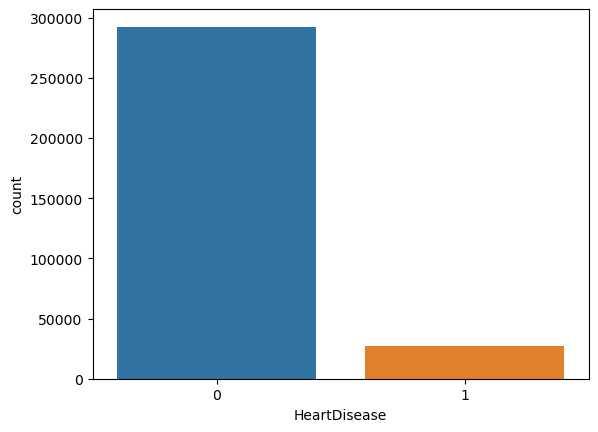

In [66]:
sbn.countplot(df['HeartDisease'])

<AxesSubplot:xlabel='AgeCategory', ylabel='count'>

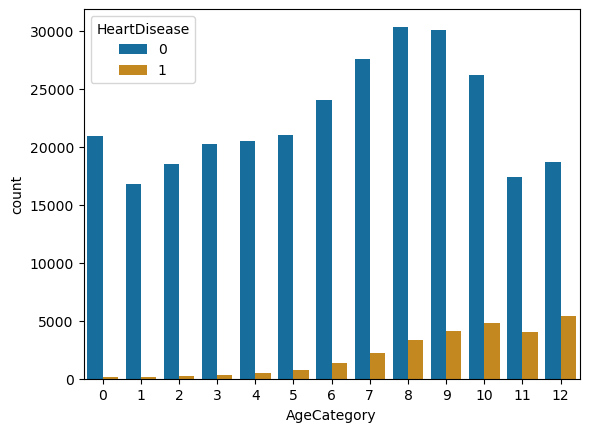

In [67]:
sbn.countplot(x = 'AgeCategory', hue = 'HeartDisease', data = df, palette = 'colorblind')

In [68]:
#train-test
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size = .3, random_state=1)

In [69]:
xtrain

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
273582,43.40,0,0,0,2,5,0,1,6,5,0,1,2,7,0,0,0
54829,36.85,1,0,0,20,0,1,0,10,5,0,0,2,7,0,0,1
1482,35.70,0,0,0,25,25,0,0,6,5,0,0,2,4,0,0,1
17407,27.07,1,0,0,5,30,1,0,5,2,0,1,4,4,0,0,0
116646,25.02,0,0,0,5,0,0,1,3,1,0,0,0,6,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117583,23.96,1,0,0,0,0,1,1,12,5,0,1,4,9,0,0,1
73349,28.62,1,0,0,0,0,0,1,7,5,0,0,0,6,0,0,0
312201,19.53,1,0,0,30,0,0,1,8,5,0,0,4,6,0,0,0
267336,25.39,0,0,0,0,5,0,0,5,5,0,1,2,6,1,0,0


In [70]:
ytrain

273582    1
54829     0
1482      1
17407     0
116646    0
         ..
117583    0
73349     0
312201    0
267336    0
128037    0
Name: HeartDisease, Length: 223856, dtype: int32

Decision Tree Classifier

In [71]:
#decision_tree_classifier object
decision_tree_classifier = DecisionTreeClassifier()

In [72]:
# fit decision_tree_classifier
decision_tree_classifier.fit(xtrain,ytrain)

DecisionTreeClassifier()

In [73]:
decision_tree_classifier.score(xtest,ytest)

0.8655604081760285

Random Forest Classifier

In [74]:
#random_classifier_object 
random_classifier_object = RandomForestClassifier()

In [75]:
random_classifier_object

RandomForestClassifier()

In [76]:
# fit Random Forest Classifier
random_classifier_object.fit(xtrain,ytrain)

RandomForestClassifier()

In [77]:
random_classifier_object.predict(xtest)

array([0, 0, 1, ..., 0, 1, 0])

In [78]:
# score of Random Forest Classifier
random_classifier_object.score(xtest,ytest)

0.9071493344729463

Logistic Regression

In [79]:
#Logistic Regression
logistic_regression_obj =  LogisticRegression()

In [80]:
logistic_regression_obj

LogisticRegression()

In [81]:
# fit Logistic Regression
logistic_regression_obj.fit(xtrain,ytrain)

C:\Users\frabb\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [82]:
# prediction Logistic Regression
logistic_regression_obj.predict(xtest)

array([0, 1, 0, ..., 0, 0, 0])

In [83]:
logistic_regression_obj.score(xtest,ytest)

0.9155296594711223